# Bank Customer Churn Model

### Learning Objextive :
1. Data Encodeing
2. feature Scaling
3. Handling Imbalance Data
 - Random Under sampling
 - Random Over sampling

4. Support Vector Machine Classifier
5. Grid Search for Hyperparameter Tunning



In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
df = pd.read_csv("/content/Bank Churn Modelling.csv")

In [218]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [220]:
df.duplicated("CustomerId").sum()

0

In [221]:
df = df.set_index("CustomerId")

In [222]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


# Encoding

In [224]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [225]:
df.replace({'Geography' : {"France" : 2,'Germany': 1, 'Spain': 0 }}, inplace=True)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  int64  
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1015.6+ KB


In [227]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [228]:
df.replace({'Gender' : {"Male" : 0, 'Female': 1 }}, inplace=True)

In [229]:
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [230]:
df.replace({'Num Of Products' : {1 : 0, 2 : 1,3 : 1,4 : 1 }}, inplace=True)

In [231]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [232]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [233]:
df.loc[(df['Balance']==0, 'Churn')].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [234]:
df['Zero Balance'] = np.where(df['Balance']>0, 1, 0)

<Axes: >

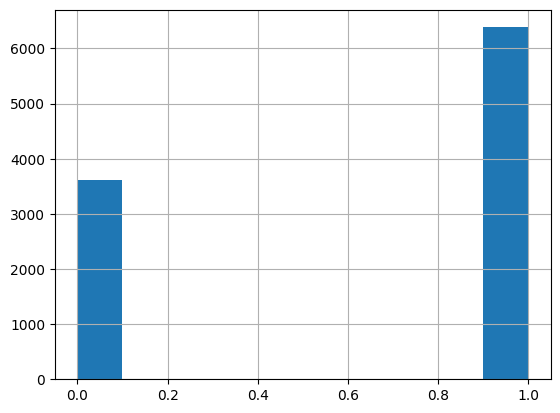

In [235]:
df['Zero Balance'].hist()

In [236]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

# Define label and features

In [237]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [238]:
x = df.drop(['Surname', 'Churn'], axis = 1 )
y = df['Churn']

In [239]:
x.shape, y.shape

((10000, 11), (10000,))

# Handling Imbalance Data

In [240]:
df['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

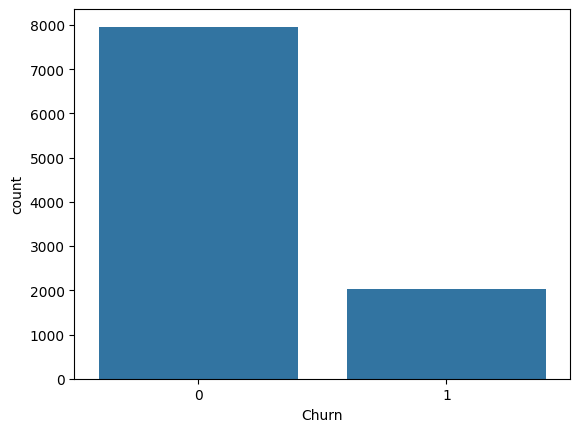

In [241]:
sns.countplot(x = 'Churn', data = df)

In [242]:
x.shape, y.shape

((10000, 11), (10000,))

In [243]:
from imblearn.under_sampling import RandomUnderSampler

In [244]:
rus = RandomUnderSampler(random_state=2529)

In [245]:
x_rus, y_rus = rus.fit_resample(x,y)

In [246]:
x_rus.shape, y_rus.shape, x.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [247]:
ros = RandomUnderSampler(random_state=2529)

In [248]:
x_ros, y_ros = ros.fit_resample(x,y)

In [249]:
x_ros.shape, y_ros.shape, x.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [250]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [251]:
y_ros.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

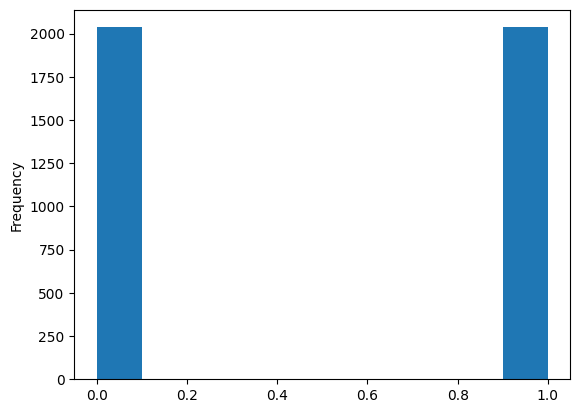

In [252]:
y_rus.plot(kind = 'hist')

<Axes: ylabel='Frequency'>

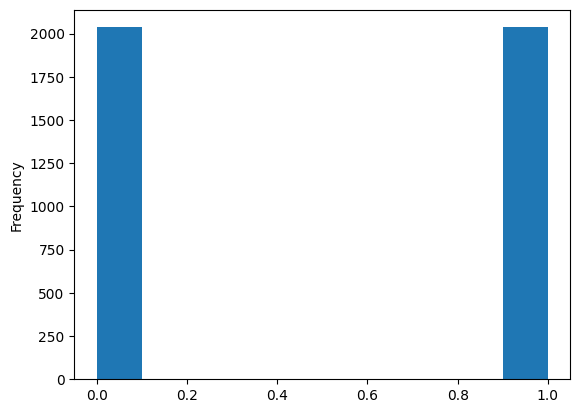

In [253]:
y_ros.plot(kind = 'hist')

# Train Test Split

In [254]:
from sklearn.model_selection import train_test_split

Split Original Data

In [255]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=25)

In [256]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Zero Balance
CustomerId,,,,,,,,,,,
15610912,657,0,1,41,6,112119.48,0,1,0,17536.82,1
15776824,714,2,0,28,6,122724.37,0,1,1,67057.27,1
15798084,688,2,0,26,0,0.00,1,1,0,105784.85,0
15569249,576,2,1,55,6,44582.07,1,0,1,67539.85,1
15771509,538,1,1,42,1,98548.62,1,0,1,94047.75,1
...,...,...,...,...,...,...,...,...,...,...,...
15721292,719,0,0,39,5,0.00,1,1,0,145759.70,0
15792627,765,0,1,33,5,84557.82,0,1,1,69039.43,1
15690188,631,2,0,33,7,0.00,0,1,1,58043.02,0


Split Random Over Sample Data

In [257]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(x_ros, y_ros, test_size=0.3, random_state=25)

Split Random Under Sample Data

In [258]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(x_rus, y_rus, test_size=0.3, random_state=25)

In [259]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [260]:
X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [261]:
X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [262]:
X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [263]:
X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

Supoort Vector Machine Classifier

In [264]:
from sklearn.svm import SVC

In [265]:
svc = SVC()

In [271]:
svc.fit(X_train, y_train)

SVC()

In [272]:
y_pred = svc.predict(X_test)

# Model Accuracy

In [273]:
from sklearn.metrics import confusion_matrix, classification_report

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[2374,   45],
       [ 421,  160]])

In [274]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2419
           1       0.78      0.28      0.41       581

    accuracy                           0.84      3000
   macro avg       0.81      0.63      0.66      3000
weighted avg       0.84      0.84      0.81      3000



In [275]:
from sklearn.model_selection import GridSearchCV


In [277]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10 ],
    'gamma': [1, 0.1, 0.01 ],
    'kernel': ['rbf'],
    'class_weight': ['balanced']}


In [279]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv = 2)
grid.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.6s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [280]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [281]:
grid_predictions = grid.predict(X_test)

In [283]:
confusion_matrix(y_test,grid_predictions)

array([[2166,  253],
       [ 365,  216]])

In [284]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2419
           1       0.46      0.37      0.41       581

    accuracy                           0.79      3000
   macro avg       0.66      0.63      0.64      3000
weighted avg       0.78      0.79      0.79      3000



Model With Under Random Sampling

In [285]:
svc_rus = SVC()

In [286]:
svc_rus.fit(X_train_rus, y_train_rus)

SVC()

In [287]:
y_pred_rus = svc.predict(X_test_rus)

# Model Accuracy

In [288]:
from sklearn.metrics import confusion_matrix, classification_report

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test_rus, y_pred_rus)
conf_matrix

array([[603,   0],
       [620,   0]])

In [290]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       603
           1       0.00      0.00      0.00       620

    accuracy                           0.49      1223
   macro avg       0.25      0.50      0.33      1223
weighted avg       0.24      0.49      0.33      1223



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hyperparameter Tunning

In [292]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10 ],
    'gamma': [1, 0.1, 0.01 ],
    'kernel': ['rbf'],
    'class_weight': ['balanced']}


In [291]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv = 2)
grid.fit(X_train_rus, y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [293]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [300]:
grid_predictions_rus = grid.predict(X_test_rus)

In [301]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[603,   0],
       [620,   0]])

In [302]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       603
           1       0.00      0.00      0.00       620

    accuracy                           0.49      1223
   macro avg       0.25      0.50      0.33      1223
weighted avg       0.24      0.49      0.33      1223



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model With Random Over Sampling

In [303]:
svc_ros = SVC()

In [304]:
svc_ros.fit(X_train_ros, y_train_ros)

SVC()

In [305]:
y_pred_ros = svc.predict(X_test_ros)

# Model Accuracy

In [306]:
from sklearn.metrics import confusion_matrix, classification_report

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test_ros, y_pred_ros)
conf_matrix

array([[599,   4],
       [479, 141]])

In [307]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.56      0.99      0.71       603
           1       0.97      0.23      0.37       620

    accuracy                           0.61      1223
   macro avg       0.76      0.61      0.54      1223
weighted avg       0.77      0.61      0.54      1223



Hyperparameter Tunning

In [308]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10 ],
    'gamma': [1, 0.1, 0.01 ],
    'kernel': ['rbf'],
    'class_weight': ['balanced']}


In [309]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv = 2)
grid.fit(X_train_ros, y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [310]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=0.01)


In [311]:
grid_predictions_ros = grid.predict(X_test_ros)

In [312]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[456, 147],
       [161, 459]])

In [313]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       603
           1       0.76      0.74      0.75       620

    accuracy                           0.75      1223
   macro avg       0.75      0.75      0.75      1223
weighted avg       0.75      0.75      0.75      1223

